In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [2]:
#Read csv file and convert into Dataframe
data=pd.read_csv(r'D:\DataTrained\Flip Robo Technology Internship\Micro Credit Project\Data file.csv')
data

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [3]:
#shape of file
data.shape

(209593, 37)

In [4]:
#Lets see the columns present in the dataset
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
# Checking for data types of the columns
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
# Checking for null values of the columns
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [7]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)
    data[column]=data[column].replace("-- ",np.nan)
    data[column]=data[column].replace("--",np.nan)

In [8]:
# Checking for null values of the columns
data.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
#As Unnamed: 0 is the index value, it is safe to drop it
data=data.drop(columns=["Unnamed: 0"])

In [10]:
#As msisdn is the mobile value, and every person has a unique mobile number, it is recommended to drop the column
data=data.drop(columns=["msisdn"])

In [11]:
#As telecom circle is same for all, ie, UPW, it is recommended to drop the column
data=data.drop(columns=["pcircle"])

In [12]:
#As pdate lies between 3 months of 2016, it is recommended to drop the column
data=data.drop(columns=["pdate"])

# Visualization of the Data, Encoding object data and filling the null values

1    183431
0     26162
Name: label, dtype: int64


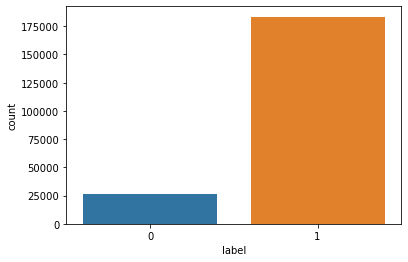

In [13]:
ax=sns.countplot(x="label", data=data)
print(data["label"].value_counts())

95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
977092.351997      1
645851.038396      1
881623.815396      1
555267.797667      1
811881.372822      1
Name: aon, Length: 4507, dtype: int64


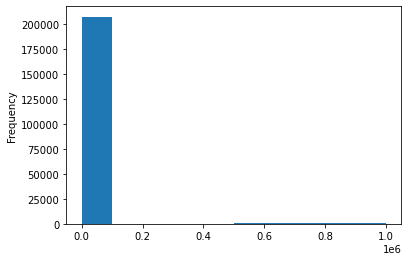

In [14]:
data.aon.plot(kind='hist')
print(data["aon"].value_counts())

In [15]:
#Considering the company is 25years old, the age on cellular network in days should be below 9130 days
daon=list(data["aon"])

In [16]:
l=len(daon)
for j in range(0,l):
    if daon[j]>9130 or daon[j]<0:
        daon[j]=np.nan

In [17]:
data["aon"]=daon

In [18]:
data["aon"]=data["aon"].fillna(np.mean(data["aon"]))

In [19]:
#As number of days should be preferably in whole numbers
data["aon"]=data["aon"].astype(int)

660     3751
95       392
92       362
96       357
99       356
        ... 
2412       1
2252       1
2360       1
2406       1
2410       1
Name: aon, Length: 2370, dtype: int64


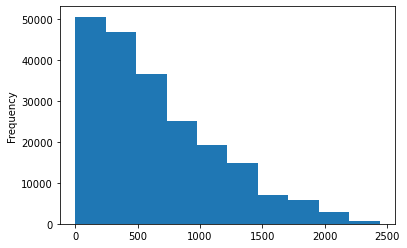

In [20]:
data.aon.plot(kind='hist')
print(data["aon"].value_counts())

0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
600.000000       354
                ... 
36.098000          1
75.915000          1
9.516667           1
21078.677000       1
4489.362000        1
Name: daily_decr30, Length: 147025, dtype: int64


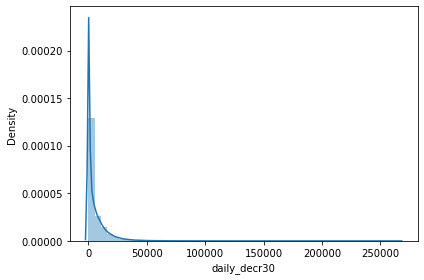

In [21]:
sns.distplot(data["daily_decr30"])
plt.xlabel("daily_decr30",fontsize=10)
plt.tight_layout()
print(data["daily_decr30"].value_counts())

In [22]:
#Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) should not be more than 3000
dp=list(data["daily_decr30"])

In [23]:
l=len(dp)
for j in range(0,l):
    if dp[j]>3000 or dp[j]<0:
        dp[j]=np.nan

In [24]:
data["daily_decr30"]=dp

In [25]:
data["daily_decr30"]=data["daily_decr30"].fillna(np.mean(data["daily_decr30"]))

520.427440     87458
0.000000        4144
500.000000       829
1000.000000      569
700.000000       381
               ...  
704.266667         1
42.603000          1
149.670000         1
46.975000          1
151.872333         1
Name: daily_decr30, Length: 79654, dtype: int64


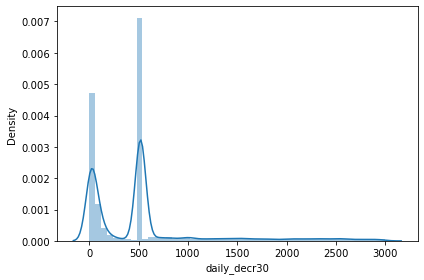

In [26]:
sns.distplot(data["daily_decr30"])
plt.xlabel("daily_decr30",fontsize=10)
plt.tight_layout()
print(data["daily_decr30"].value_counts())

0.000       4063
500.000      781
1000.000     490
700.000      343
600.000      316
            ... 
1282.220       1
1231.770       1
7385.270       1
91.425         1
4534.820       1
Name: daily_decr90, Length: 158669, dtype: int64


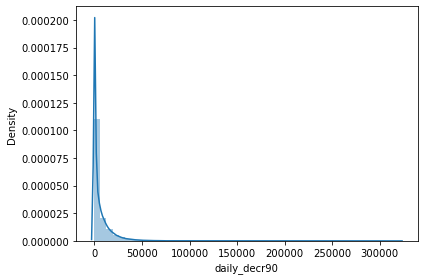

In [27]:
sns.distplot(data["daily_decr90"])
plt.xlabel("daily_decr90",fontsize=10)
plt.tight_layout()
print(data["daily_decr90"].value_counts())

In [28]:
#Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) should not be more than 3000
dk=list(data["daily_decr90"])

In [29]:
l=len(dk)
for j in range(0,l):
    if dk[j]>3000 or dk[j]<0:
        dk[j]=np.nan

In [30]:
data["daily_decr90"]=dk

In [31]:
data["daily_decr90"]=data["daily_decr90"].fillna(np.mean(data["daily_decr90"]))

511.047200     88478
0.000000        4063
500.000000       781
1000.000000      490
700.000000       343
               ...  
41.584000          1
229.071000         1
35.705000          1
2252.510000        1
151.872333         1
Name: daily_decr90, Length: 76284, dtype: int64


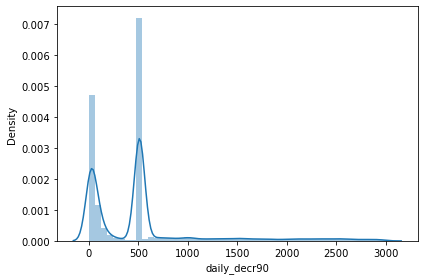

In [32]:
sns.distplot(data["daily_decr90"])
plt.xlabel("daily_decr90",fontsize=10)
plt.tight_layout()
print(data["daily_decr90"].value_counts())

0.00        7566
200.13      1379
99.56       1020
400.26       530
199.12       461
            ... 
11065.30       1
5234.44        1
948.71         1
296.75         1
483.92         1
Name: rental30, Length: 132148, dtype: int64


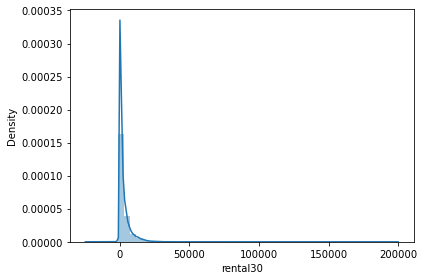

In [33]:
sns.distplot(data["rental30"])
plt.xlabel("rental30",fontsize=10)
plt.tight_layout()
print(data["rental30"].value_counts())

In [34]:
#Average rental should not be <0 and should not be greater than 5000
d=list(data["rental30"])

In [35]:
l=len(d)
for j in range(0,l):
    if d[j]<0 or d[j]>5000:
        d[j]=np.nan

In [36]:
data["rental30"]=d

In [37]:
data["rental30"]=data["rental30"].fillna(np.mean(data["rental30"]))

1272.025581    39964
0.000000        7566
200.130000      1379
99.560000       1020
400.260000       530
               ...  
657.780000         1
3708.000000        1
1315.170000        1
4728.330000        1
483.920000         1
Name: rental30, Length: 95168, dtype: int64


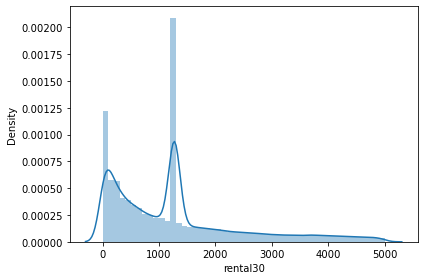

In [38]:
sns.distplot(data["rental30"])
plt.xlabel("rental30",fontsize=10)
plt.tight_layout()
print(data["rental30"].value_counts())

 0.00        6918
 200.13       913
 99.56        767
 60.00        691
 90.00        685
             ... 
 1278.64        1
 2708.63        1
-5.19           1
 17733.55       1
 984.58         1
Name: rental90, Length: 141033, dtype: int64


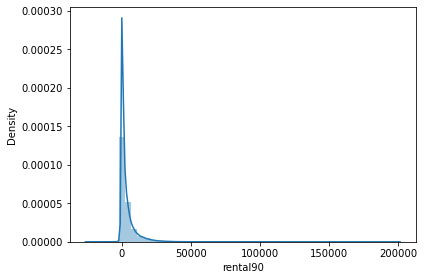

In [39]:
sns.distplot(data["rental90"])
plt.xlabel("rental90",fontsize=10)
plt.tight_layout()
print(data["rental90"].value_counts())

In [40]:
#Average rental should not be <0 an should not >5000
dd=list(data["rental90"])

In [41]:
l=len(dd)
for j in range(0,l):
    if dd[j]<0 or dd[j]>5000:
        dd[j]=np.nan

In [42]:
data["rental90"]=dd

In [43]:
data["rental90"]=data["rental90"].fillna(np.mean(data["rental90"]))

1332.011362    50280
0.000000        6918
200.130000       913
99.560000        767
60.000000        691
               ...  
4873.050000        1
3154.670000        1
430.140000         1
2826.360000        1
984.580000         1
Name: rental90, Length: 93044, dtype: int64


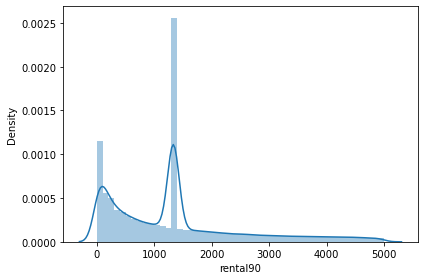

In [44]:
sns.distplot(data["rental90"])
plt.xlabel("rental90",fontsize=10)
plt.tight_layout()
print(data["rental90"].value_counts())

1.000000         47343
2.000000         26665
0.000000         20743
3.000000         19984
4.000000         15452
                 ...  
972385.270172        1
800187.053741        1
851900.041103        1
679670.490441        1
590843.121987        1
Name: last_rech_date_ma, Length: 1186, dtype: int64


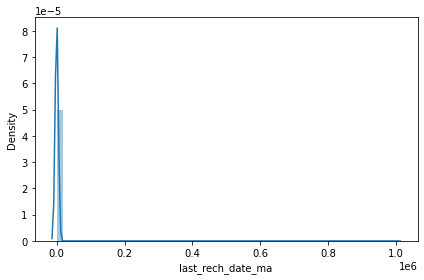

In [45]:
sns.distplot(data["last_rech_date_ma"])
plt.xlabel("last_rech_date_ma",fontsize=10)
plt.tight_layout()
print(data["last_rech_date_ma"].value_counts())

In [46]:
#Last recharge date should be as old as the company is, approx, 25 years, i.e., 9130 days
dlma=list(data["last_rech_date_ma"])

In [47]:
l=len(dlma)
for j in range(0,l):
    if dlma[j]>9130 or dlma[j]<0:
        dlma[j]=np.nan

In [48]:
data["last_rech_date_ma"]=dlma

In [49]:
data["last_rech_date_ma"]=data["last_rech_date_ma"].fillna(np.mean(data["last_rech_date_ma"]))

In [50]:
#As number of days should be preferably in whole numbers
data["last_rech_date_ma"]=data["last_rech_date_ma"].astype(int)

1      47343
2      26665
0      20743
3      19984
4      15452
       ...  
102        1
107        1
93         1
110        1
113        1
Name: last_rech_date_ma, Length: 110, dtype: int64


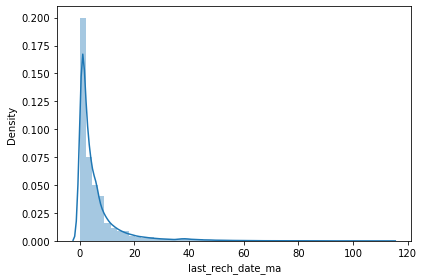

In [51]:
sns.distplot(data["last_rech_date_ma"])
plt.xlabel("last_rech_date_ma",fontsize=10)
plt.tight_layout()
print(data["last_rech_date_ma"].value_counts())

0.000000         202861
7.000000            163
8.000000            160
11.000000           149
13.000000           148
                  ...  
731116.874493         1
609105.662326         1
945424.253703         1
505559.452693         1
636529.127252         1
Name: last_rech_date_da, Length: 1174, dtype: int64


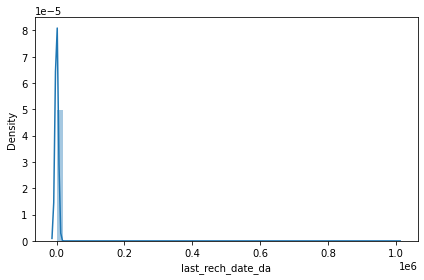

In [52]:
sns.distplot(data["last_rech_date_da"])
plt.xlabel("last_rech_date_da",fontsize=10)
plt.tight_layout()
print(data["last_rech_date_da"].value_counts())

In [53]:
#Last recharge date should be as old as the company is, approx, 25 years, i.e., 9130 days
dlda=list(data["last_rech_date_da"])

In [54]:
l=len(dlda)
for j in range(0,l):
    if dlda[j]>9130 or dlda[j]<0:
        dlda[j]=np.nan

In [55]:
data["last_rech_date_da"]=dlda

In [56]:
data["last_rech_date_da"]=data["last_rech_date_da"].fillna(np.mean(data["last_rech_date_da"]))

In [57]:
#As number of days should be preferably in whole numbers
data["last_rech_date_da"]=data["last_rech_date_da"].astype(int)

0      203922
7         163
8         160
11        149
13        148
        ...  
114         3
87          2
81          2
115         1
90          1
Name: last_rech_date_da, Length: 116, dtype: int64


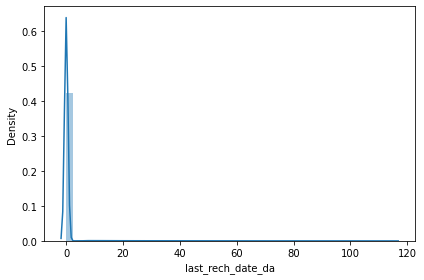

In [58]:
sns.distplot(data["last_rech_date_da"])
plt.xlabel("last_rech_date_da",fontsize=10)
plt.tight_layout()
print(data["last_rech_date_da"].value_counts())

1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
4066         1
15652        1
772          1
34783        1
10454        1
Name: last_rech_amt_ma, Length: 70, dtype: int64


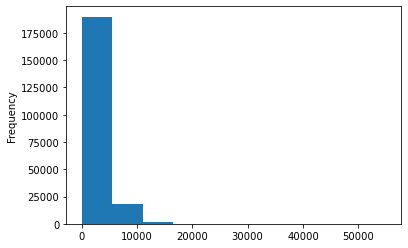

In [59]:
data.last_rech_amt_ma.plot(kind='hist')
print(data["last_rech_amt_ma"].value_counts())

1     37238
2     31216
0     27979
3     25519
4     20258
      ...  
84        1
59        1
64        1
74        1
63        1
Name: cnt_ma_rech30, Length: 71, dtype: int64


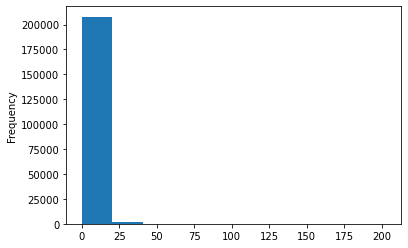

In [60]:
data.cnt_ma_rech30.plot(kind='hist')
print(data["cnt_ma_rech30"].value_counts())

0.000000         78683
1.000000         22370
2.000000         18849
3.000000         14306
4.000000         11194
                 ...  
967338.131624        1
779697.846039        1
723333.519767        1
891246.004030        1
747564.075282        1
Name: fr_ma_rech30, Length: 1083, dtype: int64


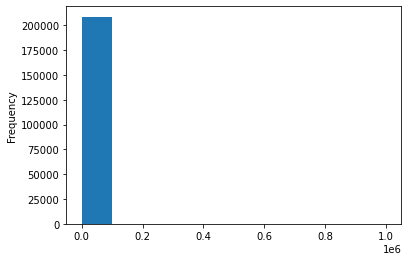

In [61]:
data.fr_ma_rech30.plot(kind='hist')
print(data["fr_ma_rech30"].value_counts())

In [62]:
#Frequency of times data account got recharged in last 30 days should not be more than 3000
df=list(data["fr_ma_rech30"])

In [63]:
l=len(df)
for j in range(0,l):
    if df[j]>3000 or df[j]<0:
        df[j]=np.nan

In [64]:
data["fr_ma_rech30"]=df

In [65]:
data["fr_ma_rech30"]=data["fr_ma_rech30"].fillna(np.mean(data["fr_ma_rech30"]))

0.000000     78683
1.000000     22370
2.000000     18849
3.000000     14306
4.000000     11194
5.000000      8982
6.000000      7785
7.000000      6908
8.000000      6116
9.000000      5100
10.000000     4261
11.000000     3583
12.000000     3043
13.000000     2693
14.000000     2280
15.000000     1990
16.000000     1604
17.000000     1438
18.000000     1242
3.895563      1047
19.000000     1023
20.000000      854
21.000000      781
22.000000      697
23.000000      546
24.000000      470
25.000000      364
26.000000      351
27.000000      252
28.000000      204
29.000000      159
35.000000       89
36.000000       82
34.000000       68
30.000000       64
37.000000       58
38.000000       57
Name: fr_ma_rech30, dtype: int64


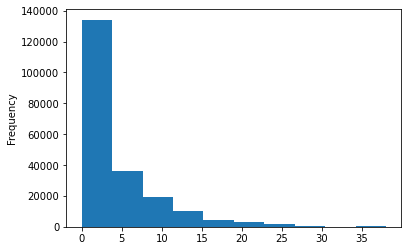

In [66]:
data.fr_ma_rech30.plot(kind='hist')
print(data["fr_ma_rech30"].value_counts())

0.0        27979
1539.0      9006
770.0       6040
773.0       4540
2309.0      4509
           ...  
40924.0        1
38412.0        1
22899.0        1
5381.0         1
12154.0        1
Name: sumamnt_ma_rech30, Length: 15141, dtype: int64


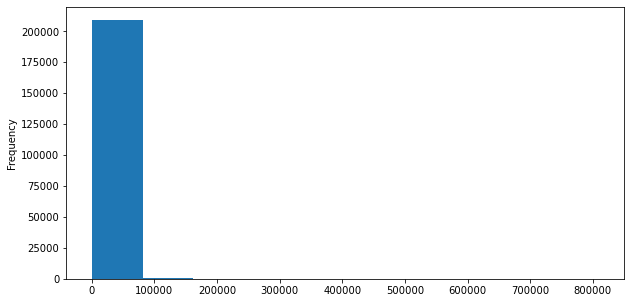

In [67]:
plt.figure(figsize=(10,5))
data.sumamnt_ma_rech30.plot(kind='hist')
print(data["sumamnt_ma_rech30"].value_counts())

1539.0     47769
770.0      30754
0.0        27979
773.0      22680
2309.0     11177
           ...  
2690.5         1
4729.5         1
4742.0         1
3566.5         1
10963.5        1
Name: medianamnt_ma_rech30, Length: 510, dtype: int64


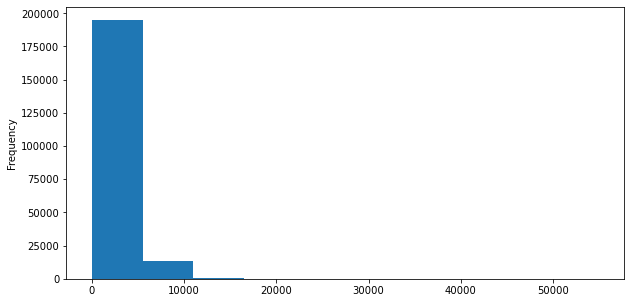

In [68]:
plt.figure(figsize=(10,5))
data.medianamnt_ma_rech30.plot(kind='hist')
print(data["medianamnt_ma_rech30"].value_counts())

0.000000         30680
20.000000         1108
19.000000         1091
17.000000         1060
10.000000         1045
                 ...  
733852.248522        1
49.200000            1
70.810000            1
2051.000000          1
71.370000            1
Name: medianmarechprebal30, Length: 30428, dtype: int64


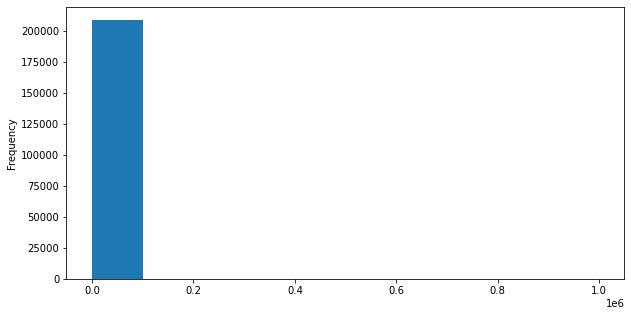

In [69]:
plt.figure(figsize=(10,5))
data.medianmarechprebal30.plot(kind='hist')
print(data["medianmarechprebal30"].value_counts())

In [70]:
#Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) should not be more than 3000
dx=list(data["medianmarechprebal30"])

In [71]:
l=len(dx)
for j in range(0,l):
    if dx[j]>3000 or dx[j]<0:
        dx[j]=np.nan

In [72]:
data["medianmarechprebal30"]=dx

In [73]:
data["medianmarechprebal30"]=data["medianmarechprebal30"].fillna(np.mean(data["medianmarechprebal30"]))

0.000000       30680
87.984085       3005
20.000000       1108
19.000000       1091
17.000000       1060
               ...  
295.940000         1
85.630000          1
2821.620000        1
24.340000          1
71.370000          1
Name: medianmarechprebal30, Length: 28042, dtype: int64


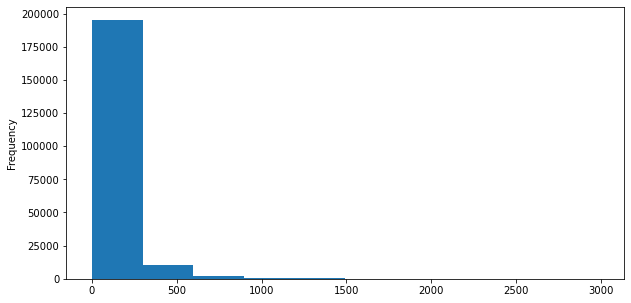

In [74]:
plt.figure(figsize=(10,5))
data.medianmarechprebal30.plot(kind='hist')
print(data["medianmarechprebal30"].value_counts())

1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
105        1
110        1
140        1
94         1
120        1
Name: cnt_ma_rech90, Length: 110, dtype: int64


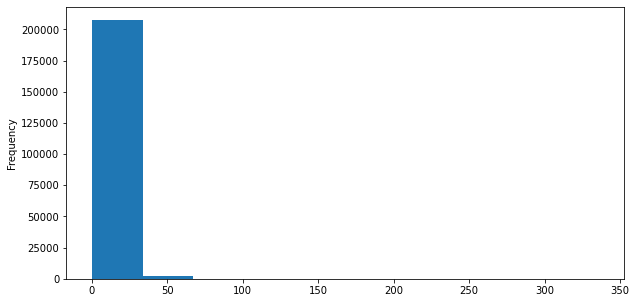

In [75]:
plt.figure(figsize=(10,5))
data.cnt_ma_rech90.plot(kind='hist')
print(data["cnt_ma_rech90"].value_counts())

0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64


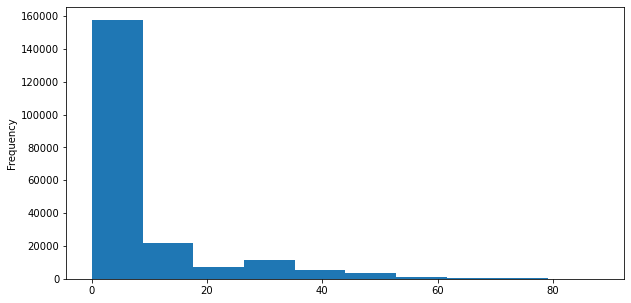

In [76]:
plt.figure(figsize=(10,5))
data.fr_ma_rech90.plot(kind='hist')
print(data["fr_ma_rech90"].value_counts())

0        20950
1539      5631
773       4177
770       3982
2309      2542
         ...  
32427        1
71229        1
78428        1
8241         1
17941        1
Name: sumamnt_ma_rech90, Length: 31771, dtype: int64


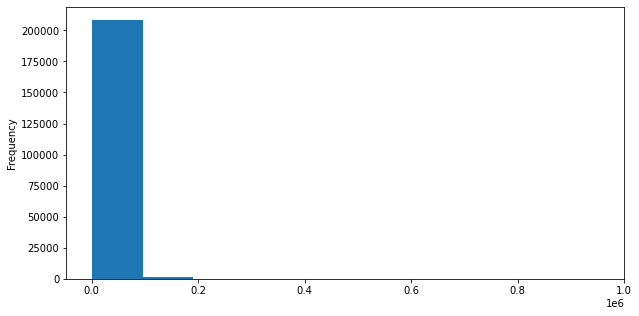

In [77]:
plt.figure(figsize=(10,5))
data.sumamnt_ma_rech90.plot(kind='hist')
print(data["sumamnt_ma_rech90"].value_counts())

1539.0     45780
773.0      30543
770.0      23844
0.0        20950
2309.0     10665
           ...  
8708.5         1
6350.0         1
4700.0         1
6818.0         1
10963.5        1
Name: medianamnt_ma_rech90, Length: 608, dtype: int64


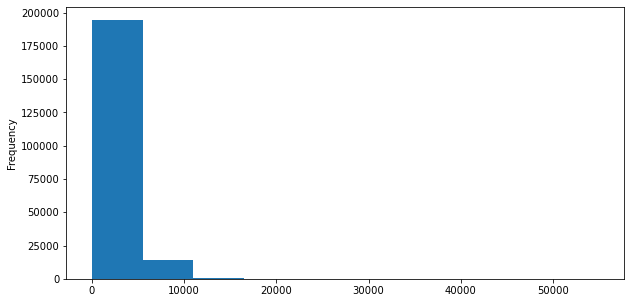

In [78]:
plt.figure(figsize=(10,5))
data.medianamnt_ma_rech90.plot(kind='hist')
print(data["medianamnt_ma_rech90"].value_counts())

1539.0     45780
773.0      30543
770.0      23844
0.0        20950
2309.0     10665
           ...  
8708.5         1
6350.0         1
4700.0         1
6818.0         1
10963.5        1
Name: medianamnt_ma_rech90, Length: 608, dtype: int64


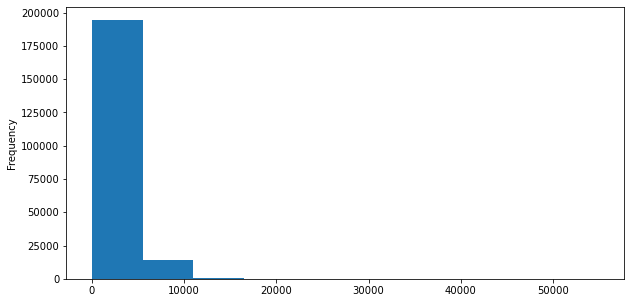

In [79]:
plt.figure(figsize=(10,5))
data.medianamnt_ma_rech90.plot(kind='hist')
print(data["medianamnt_ma_rech90"].value_counts())

0.00      23391
20.00      1265
19.00      1208
26.00      1171
27.00      1166
          ...  
524.07        1
7.72          1
45.73         1
143.06        1
392.20        1
Name: medianmarechprebal90, Length: 29785, dtype: int64


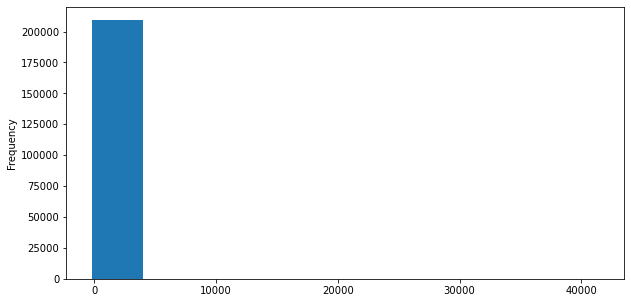

In [80]:
plt.figure(figsize=(10,5))
data.medianmarechprebal90.plot(kind='hist')
print(data["medianmarechprebal90"].value_counts())

0.000000        205479
1.000000          2331
2.000000           372
3.000000           156
4.000000            86
                 ...  
13710.643665         1
84844.562846         1
65385.403518         1
93840.663070         1
61002.421345         1
Name: cnt_da_rech30, Length: 1066, dtype: int64


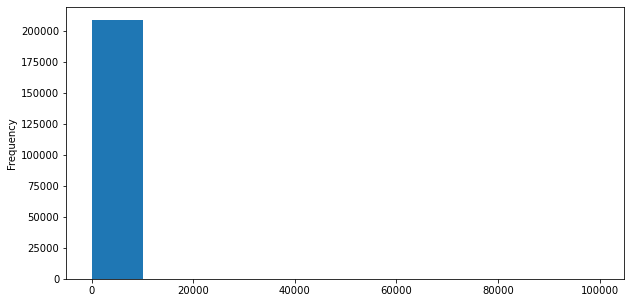

In [81]:
plt.figure(figsize=(10,5))
data.cnt_da_rech30.plot(kind='hist')
print(data["cnt_da_rech30"].value_counts())

In [82]:
#Number of times data account got recharged in last 30 days should not be more than 3000
dcdr=list(data["cnt_da_rech30"])

In [83]:
l=len(dcdr)
for j in range(0,l):
    if dcdr[j]>3000 or dcdr[j]<0:
        dcdr[j]=np.nan

In [84]:
data["cnt_da_rech30"]=dcdr

In [85]:
data["cnt_da_rech30"]=data["cnt_da_rech30"].fillna(np.mean(data["cnt_da_rech30"]))

In [86]:
#As number of times should be preferably in whole numbers
data["cnt_da_rech30"]=data["cnt_da_rech30"].astype(int)

0     206526
1       2331
2        372
3        156
4         86
5         34
6         27
7         20
9         12
8          9
10         5
11         4
13         3
12         2
16         2
14         1
34         1
15         1
18         1
Name: cnt_da_rech30, dtype: int64


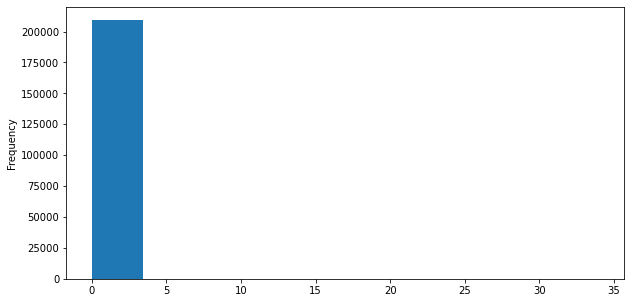

In [87]:
plt.figure(figsize=(10,5))
data.cnt_da_rech30.plot(kind='hist')
print(data["cnt_da_rech30"].value_counts())

0.000000         208014
3.000000             64
1.000000             55
2.000000             51
7.000000             47
                  ...  
757900.530472         1
870976.477512         1
797647.001920         1
519699.885393         1
509386.302670         1
Name: fr_da_rech30, Length: 1072, dtype: int64


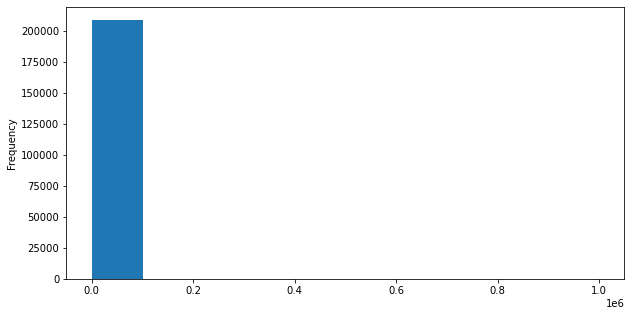

In [88]:
plt.figure(figsize=(10,5))
data.fr_da_rech30.plot(kind='hist')
print(data["fr_da_rech30"].value_counts())

In [89]:
#Number of times data account got recharged in last 30 days should not be more than 3000
dg=list(data["fr_da_rech30"])

In [90]:
l=len(dg)
for j in range(0,l):
    if dg[j]>3000 or dg[j]<0:
        dg[j]=np.nan

In [91]:
data["fr_da_rech30"]=dg

In [92]:
data["fr_da_rech30"]=data["fr_da_rech30"].fillna(np.mean(data["fr_da_rech30"]))

0.000000     208014
0.018039       1047
3.000000         64
1.000000         55
2.000000         51
7.000000         47
4.000000         45
6.000000         38
5.000000         36
8.000000         34
10.000000        19
9.000000         19
11.000000        18
12.000000        16
14.000000        15
13.000000        15
15.000000        13
18.000000        11
16.000000         9
19.000000         8
17.000000         6
20.000000         6
23.000000         2
21.000000         2
22.000000         2
25.000000         1
Name: fr_da_rech30, dtype: int64


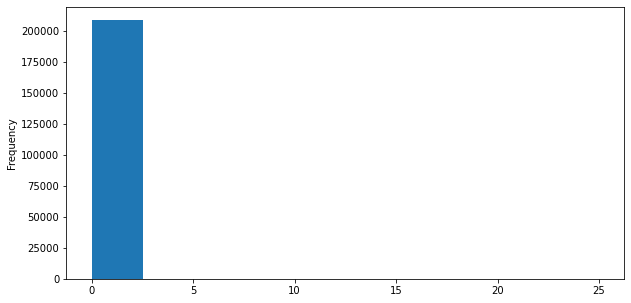

In [93]:
plt.figure(figsize=(10,5))
data.fr_da_rech30.plot(kind='hist')
print(data["fr_da_rech30"].value_counts())

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
13         6
10         6
16         4
18         3
15         2
20         1
25         1
28         1
30         1
22         1
38         1
19         1
27         1
17         1
Name: cnt_da_rech90, dtype: int64


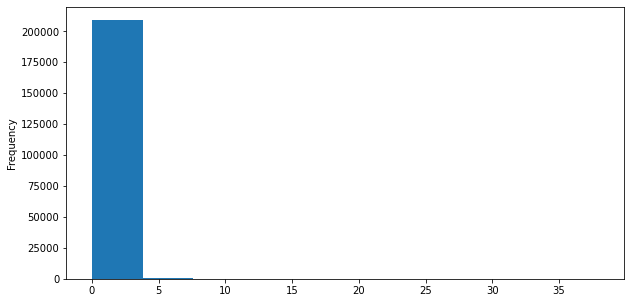

In [94]:
plt.figure(figsize=(10,5))
data.cnt_da_rech90.plot(kind='hist')
print(data["cnt_da_rech90"].value_counts())

0     208728
3         78
1         66
2         66
4         56
7         55
6         52
5         45
8         44
10        33
14        32
9         32
11        30
12        27
19        22
28        19
15        17
13        17
18        16
29        15
16        14
17        14
25        11
22        11
21        10
20         9
32         8
24         8
27         8
26         7
30         7
31         6
34         5
37         5
23         5
57         3
35         2
41         2
42         1
39         1
33         1
43         1
56         1
46         1
55         1
64         1
Name: fr_da_rech90, dtype: int64


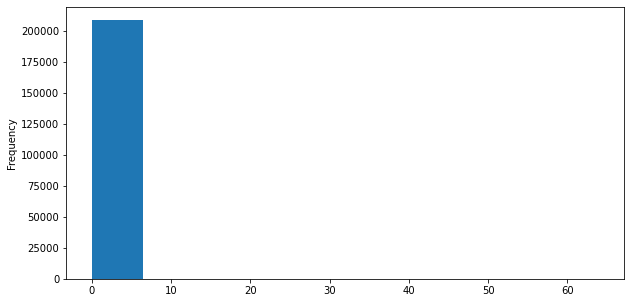

In [95]:
plt.figure(figsize=(10,5))
data.fr_da_rech90.plot(kind='hist')
print(data["fr_da_rech90"].value_counts())

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
36        1
41        1
44        1
50        1
35        1
Name: cnt_loans30, dtype: int64


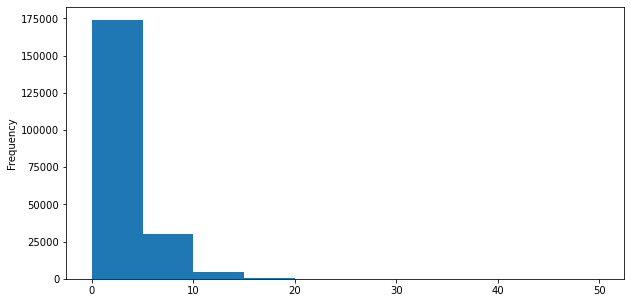

In [96]:
plt.figure(figsize=(10,5))
data.cnt_loans30.plot(kind='hist')
print(data["cnt_loans30"].value_counts())

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
150       30
144       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
252        4
210        4
228        4
216        4
222        3
258        3
264        3
276        3
240        2
204        2
246        1
300        1
270        1
306        1
Name: amnt_loans30, dtype: int64


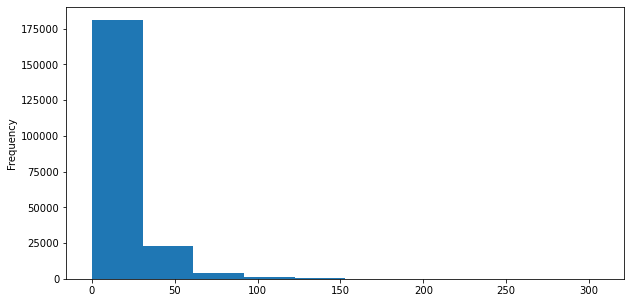

In [97]:
plt.figure(figsize=(10,5))
data.amnt_loans30.plot(kind='hist')
print(data["amnt_loans30"].value_counts())

6.000000        179193
12.000000        26109
0.000000          3244
17083.998141         1
62511.750702         1
                 ...  
30346.385852         1
66821.819056         1
55716.817238         1
41580.156627         1
96927.243252         1
Name: maxamnt_loans30, Length: 1050, dtype: int64


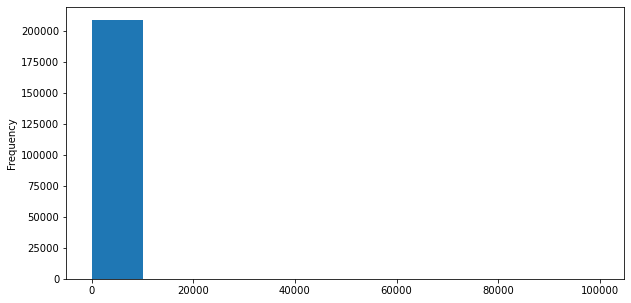

In [98]:
plt.figure(figsize=(10,5))
data.maxamnt_loans30.plot(kind='hist')
print(data["maxamnt_loans30"].value_counts())

In [99]:
#maximum amount of loan taken by the user in last 30 days should be either 6 or 12
dml=list(data["maxamnt_loans30"])

In [100]:
l=len(dml)
for j in range(0,l):
    if dml[j]==6 or dml[j]==12 or dml[j]==0:
        continue
    else:
        dml[j]=np.nan

In [101]:
data["maxamnt_loans30"]=dml

In [102]:
data["maxamnt_loans30"]=data["maxamnt_loans30"].fillna(data["maxamnt_loans30"].mode()[0])

6     180240
12     26109
0       3244
Name: maxamnt_loans30, dtype: int64


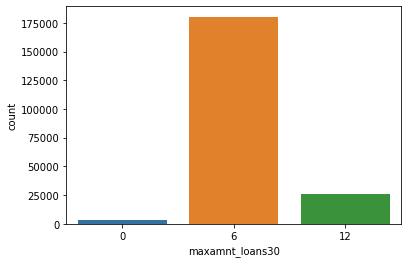

In [105]:
ax=sns.countplot(x="maxamnt_loans30", data=data)
print(data["maxamnt_loans30"].value_counts())

In [104]:
#As number of times should be preferably in whole numbers
data["maxamnt_loans30"]=data["maxamnt_loans30"].astype(int)

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64


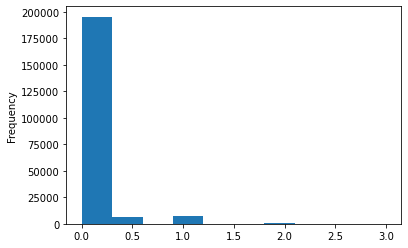

In [106]:
data.medianamnt_loans30.plot(kind='hist')
print(data["medianamnt_loans30"].value_counts())

1.000000       73862
2.000000       37286
3.000000       23986
4.000000       16761
5.000000       12331
               ...  
3940.313295        1
2547.650840        1
2925.920310        1
1757.322504        1
2047.902454        1
Name: cnt_loans90, Length: 1110, dtype: int64


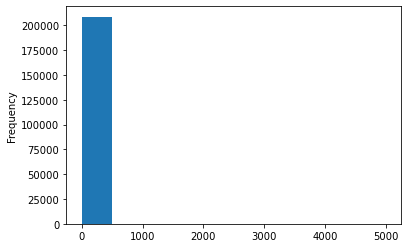

In [107]:
data.cnt_loans90.plot(kind='hist')
print(data["cnt_loans90"].value_counts())

In [108]:
#Number of loans taken by user in last 90 days taken by the user in last 30 days should be less than 300
dcl=list(data["cnt_loans90"])

In [109]:
l=len(dcl)
for j in range(0,l):
    if dcl[j]>300 or dcl[j]<0:
        dcl[j]=np.nan

In [110]:
data["cnt_loans90"]=dcl

In [111]:
data["cnt_loans90"]=data["cnt_loans90"].fillna(data["cnt_loans90"].mean())

In [112]:
#As number of times should be preferably in whole numbers
data["cnt_loans90"]=data["cnt_loans90"].astype(int)

1     73862
2     37286
3     25033
4     16761
5     12331
      ...  
62        1
68        1
58        1
56        1
47        1
Name: cnt_loans90, Length: 63, dtype: int64


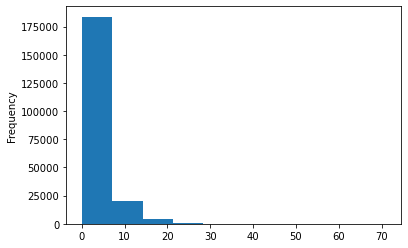

In [113]:
data.cnt_loans90.plot(kind='hist')
print(data["cnt_loans90"].value_counts())

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
438        1
360        1
372        1
402        1
426        1
Name: amnt_loans90, Length: 69, dtype: int64


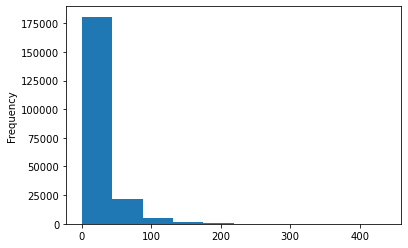

In [114]:
data.amnt_loans90.plot(kind='hist')
print(data["amnt_loans90"].value_counts())

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


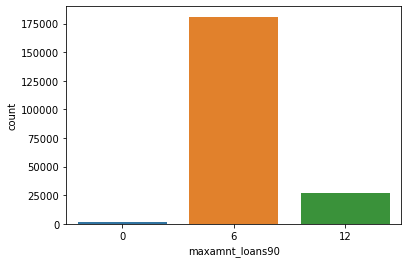

In [115]:
ax=sns.countplot(x="maxamnt_loans90", data=data)
print(data["maxamnt_loans90"].value_counts())

0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


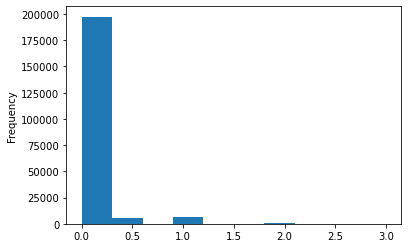

In [116]:
data.medianamnt_loans90.plot(kind='hist')
print(data["medianamnt_loans90"].value_counts())

0.000000     106712
2.000000       5601
3.000000       5023
4.000000       3931
2.500000       3518
              ...  
4.545455          1
48.400000         1
3.133333          1
1.518519          1
5.615385          1
Name: payback30, Length: 1363, dtype: int64


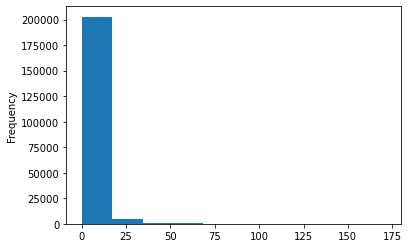

In [117]:
data.payback30.plot(kind='hist')
print(data["payback30"].value_counts())

In [118]:
#As days should be preferably in whole numbers
data["payback30"]=data["payback30"].astype(int)

0      106712
2       21465
3       16717
1       13656
4       11758
        ...  
161         1
171         1
121         1
163         1
129         1
Name: payback30, Length: 168, dtype: int64


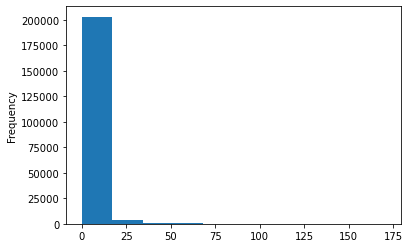

In [119]:
data.payback30.plot(kind='hist')
print(data["payback30"].value_counts())

0.000000     95699
2.000000      4982
3.000000      4437
4.000000      3610
2.500000      3015
             ...  
35.625000        1
48.400000        1
8.363636         1
62.666667        1
25.846154        1
Name: payback90, Length: 2381, dtype: int64


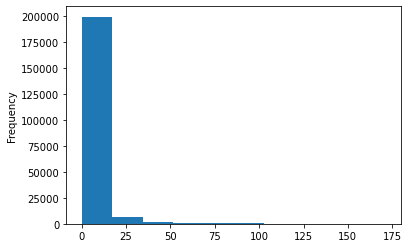

In [120]:
data.payback90.plot(kind='hist')
print(data["payback90"].value_counts())

In [121]:
#As days should be preferably in whole numbers
data["payback90"]=data["payback90"].astype(int)

0      95699
2      21867
3      17874
1      13004
4      12721
       ...  
170        2
164        1
171        1
121        1
163        1
Name: payback90, Length: 169, dtype: int64


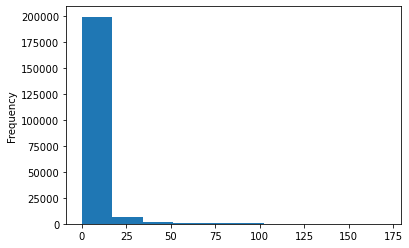

In [122]:
data.payback90.plot(kind='hist')
print(data["payback90"].value_counts())

In [123]:
data.shape

(209593, 33)

In [124]:
#Statistical Analysis
for column in data:
    print("-----------", column, "--------------")
    print(data[column].describe())

----------- label --------------
count    209593.000000
mean          0.875177
std           0.330519
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64
----------- aon --------------
count    209593.000000
mean        660.200880
std         493.406361
min           1.000000
25%         252.000000
50%         537.000000
75%         957.000000
max        2440.000000
Name: aon, dtype: float64
----------- daily_decr30 --------------
count    209593.000000
mean        520.427440
std         619.024143
min           0.000000
25%          45.500000
50%         520.427440
75%         520.427440
max        3000.000000
Name: daily_decr30, dtype: float64
----------- daily_decr90 --------------
count    209593.00000
mean        511.04720
std         610.80538
min           0.00000
25%          45.79200
50%         511.04720
75%         511.04720
max        3000.00000
Name: daily_decr90, dtype: float64
----

# Checking Correlation

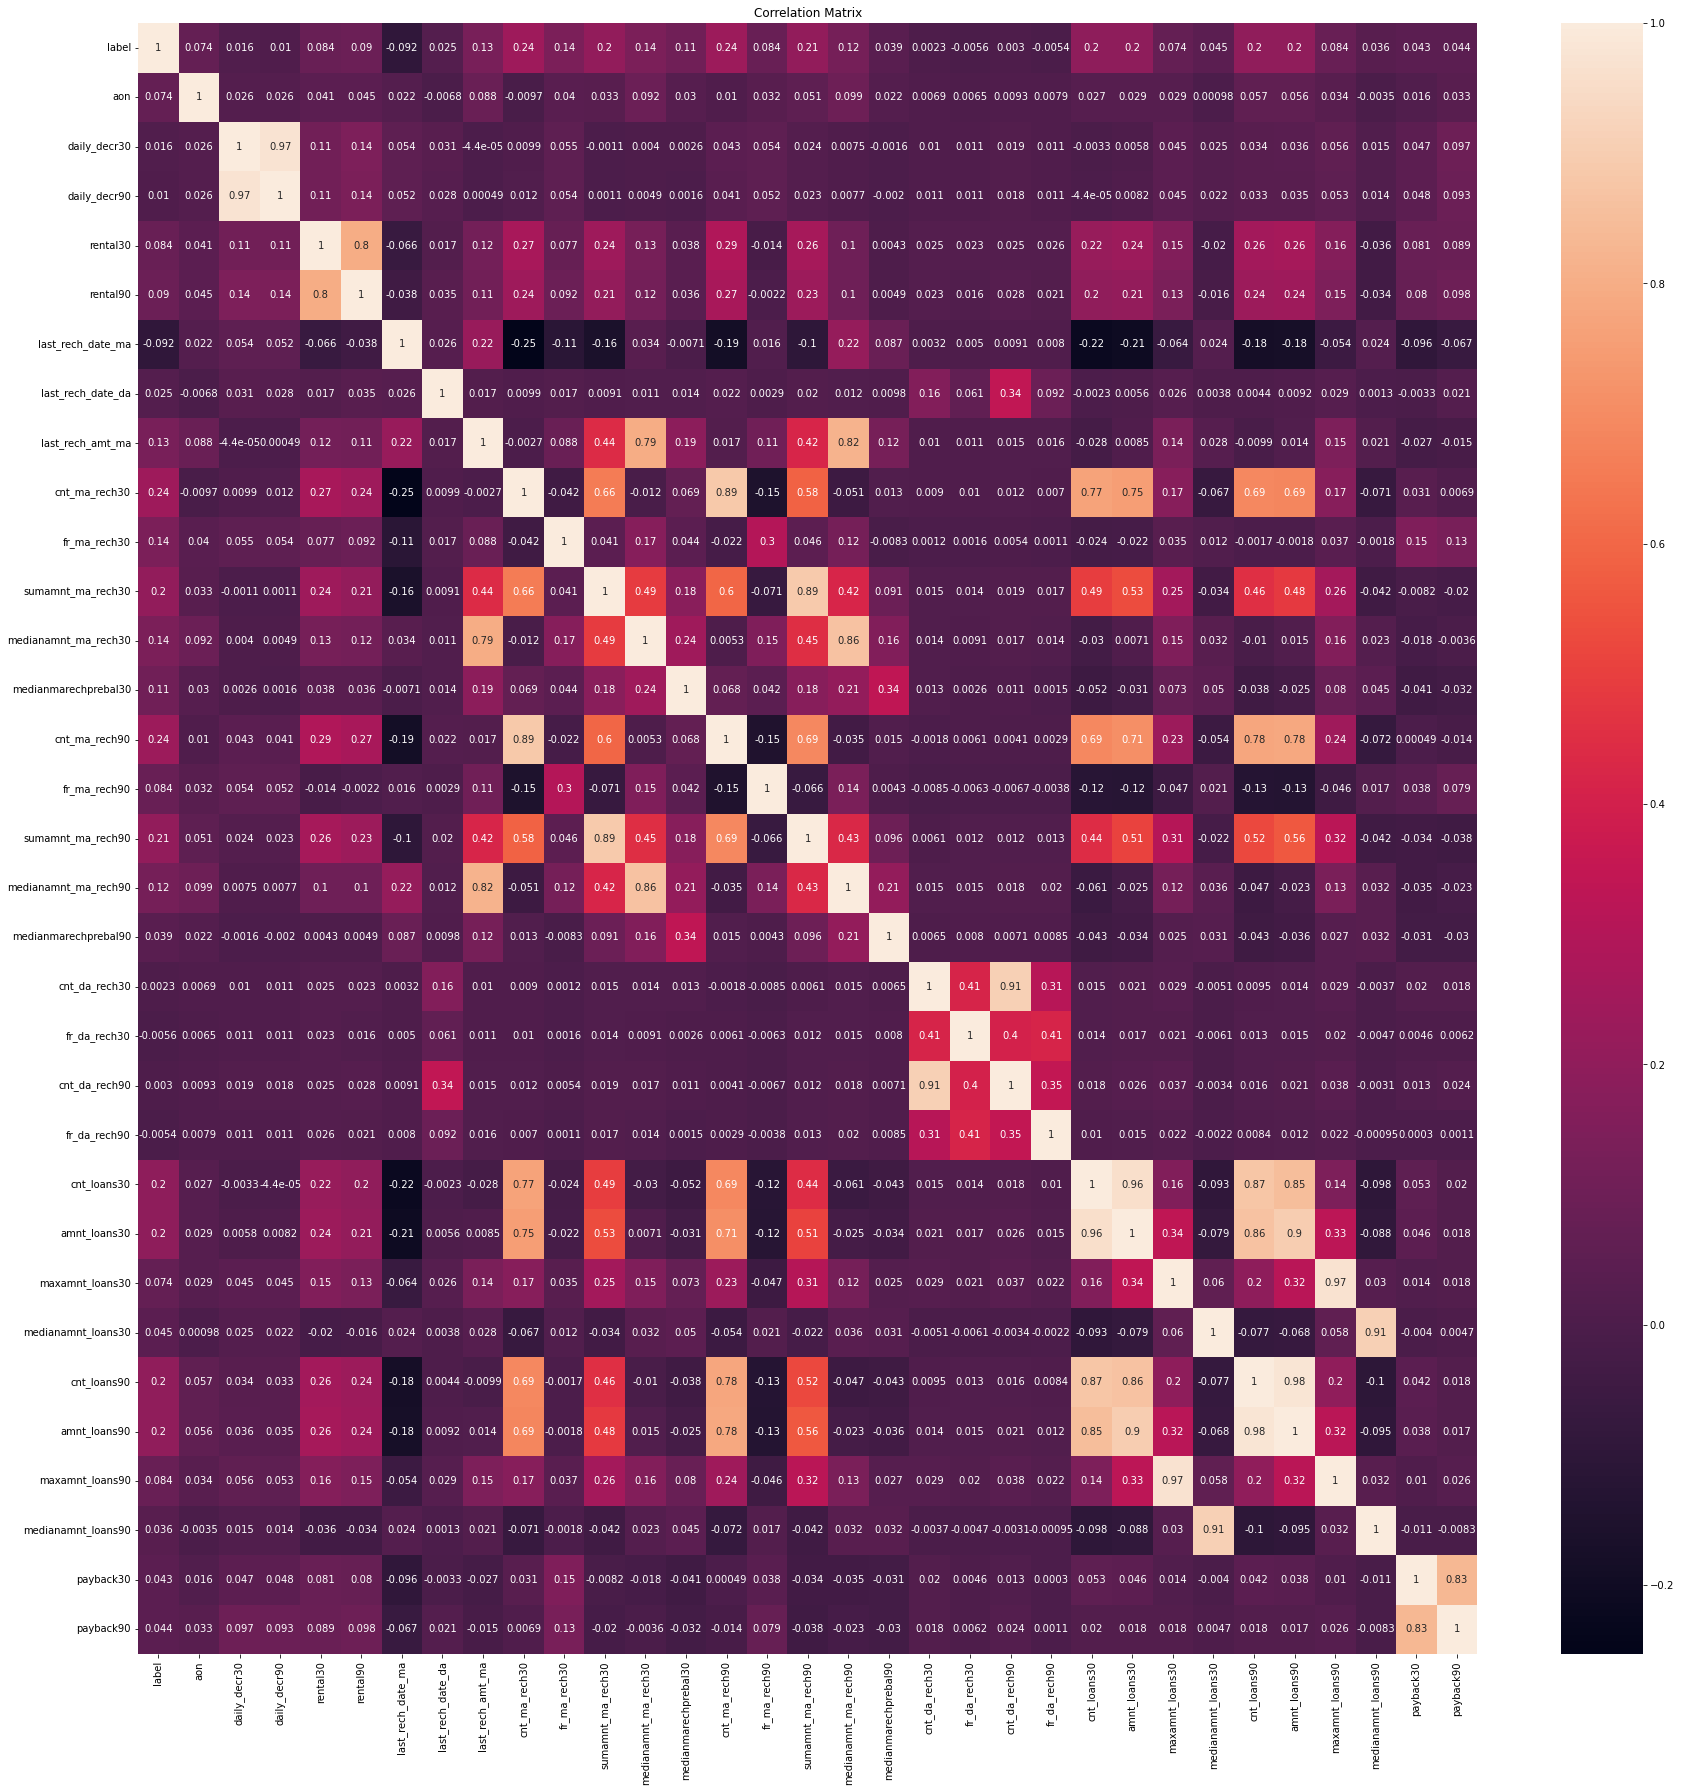

In [125]:
#Lets view the heatmap
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[30,30])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':10})
plt.title("Correlation Matrix")
plt.show()

In [126]:
#Let's print the correlation coefficient for the Prediction with label

corr_matrix=data.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
cnt_loans90             0.199593
amnt_loans30            0.197272
cnt_loans30             0.196283
fr_ma_rech30            0.142612
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
medianmarechprebal30    0.106691
rental90                0.090129
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental30                0.083731
maxamnt_loans30         0.073959
aon                     0.073587
medianamnt_loans30      0.044589
payback90               0.044201
payback30               0.043311
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
last_rech_date_da       0.024841
daily_decr30            0.015940
daily_decr90            0.010440
cnt_da_rech90           0.002999
cnt_da_rech30           0.002333
fr_da_rech

# Checking for outliers

In [127]:
data.shape

(209593, 33)

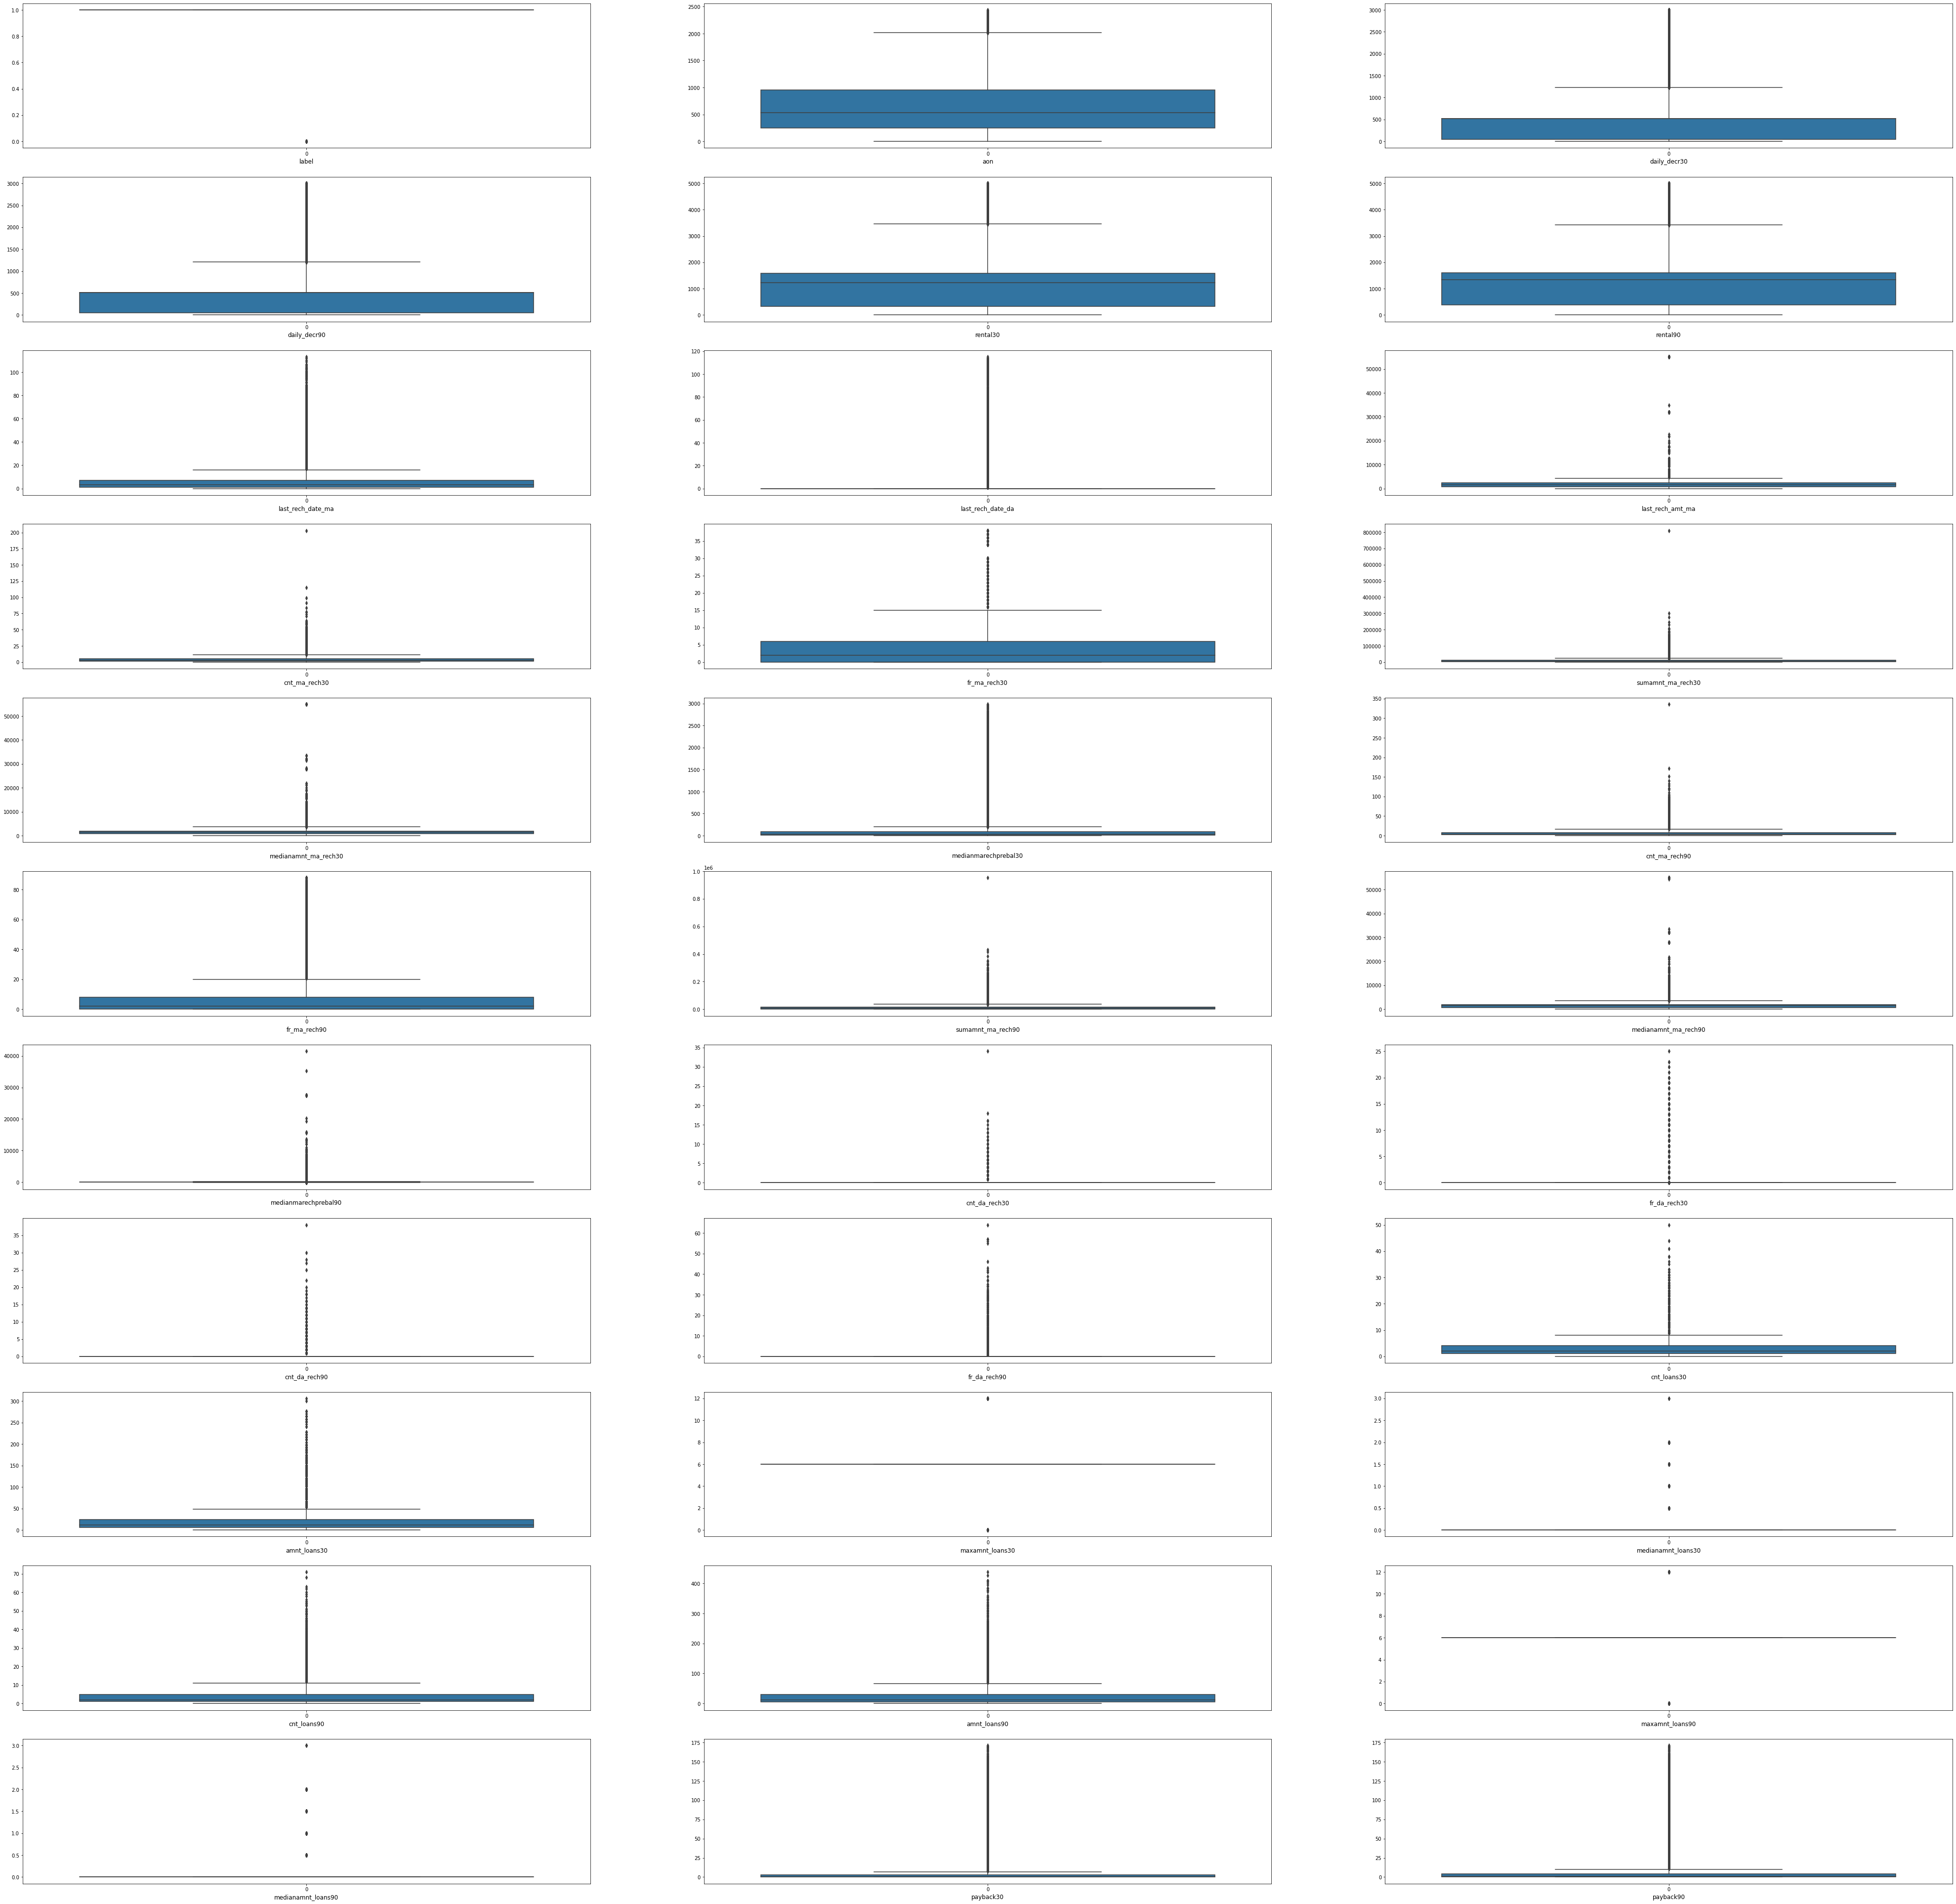

In [128]:
#visulaize the outliers using boxplot
plt.figure(figsize=(70,70))
graph=1

for column in data:
    if graph<=33:
        ax=plt.subplot(11,3,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=12)
    graph=graph+1
plt.show()

In [129]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(209593, 33)

In [130]:
threshold=3
print(np.where(z>3))

(array([     0,      3,      6, ..., 209587, 209587, 209591], dtype=int64), array([10,  6,  2, ..., 26, 30,  7], dtype=int64))


In [131]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(209593, 33)
(150496, 33)



As data loss is 27.9% outliers are tolerated

# Divide Data Set into features and labels

In [132]:
y=data['label']
x=data.drop(columns=['label'])

# Visualizing Relationship

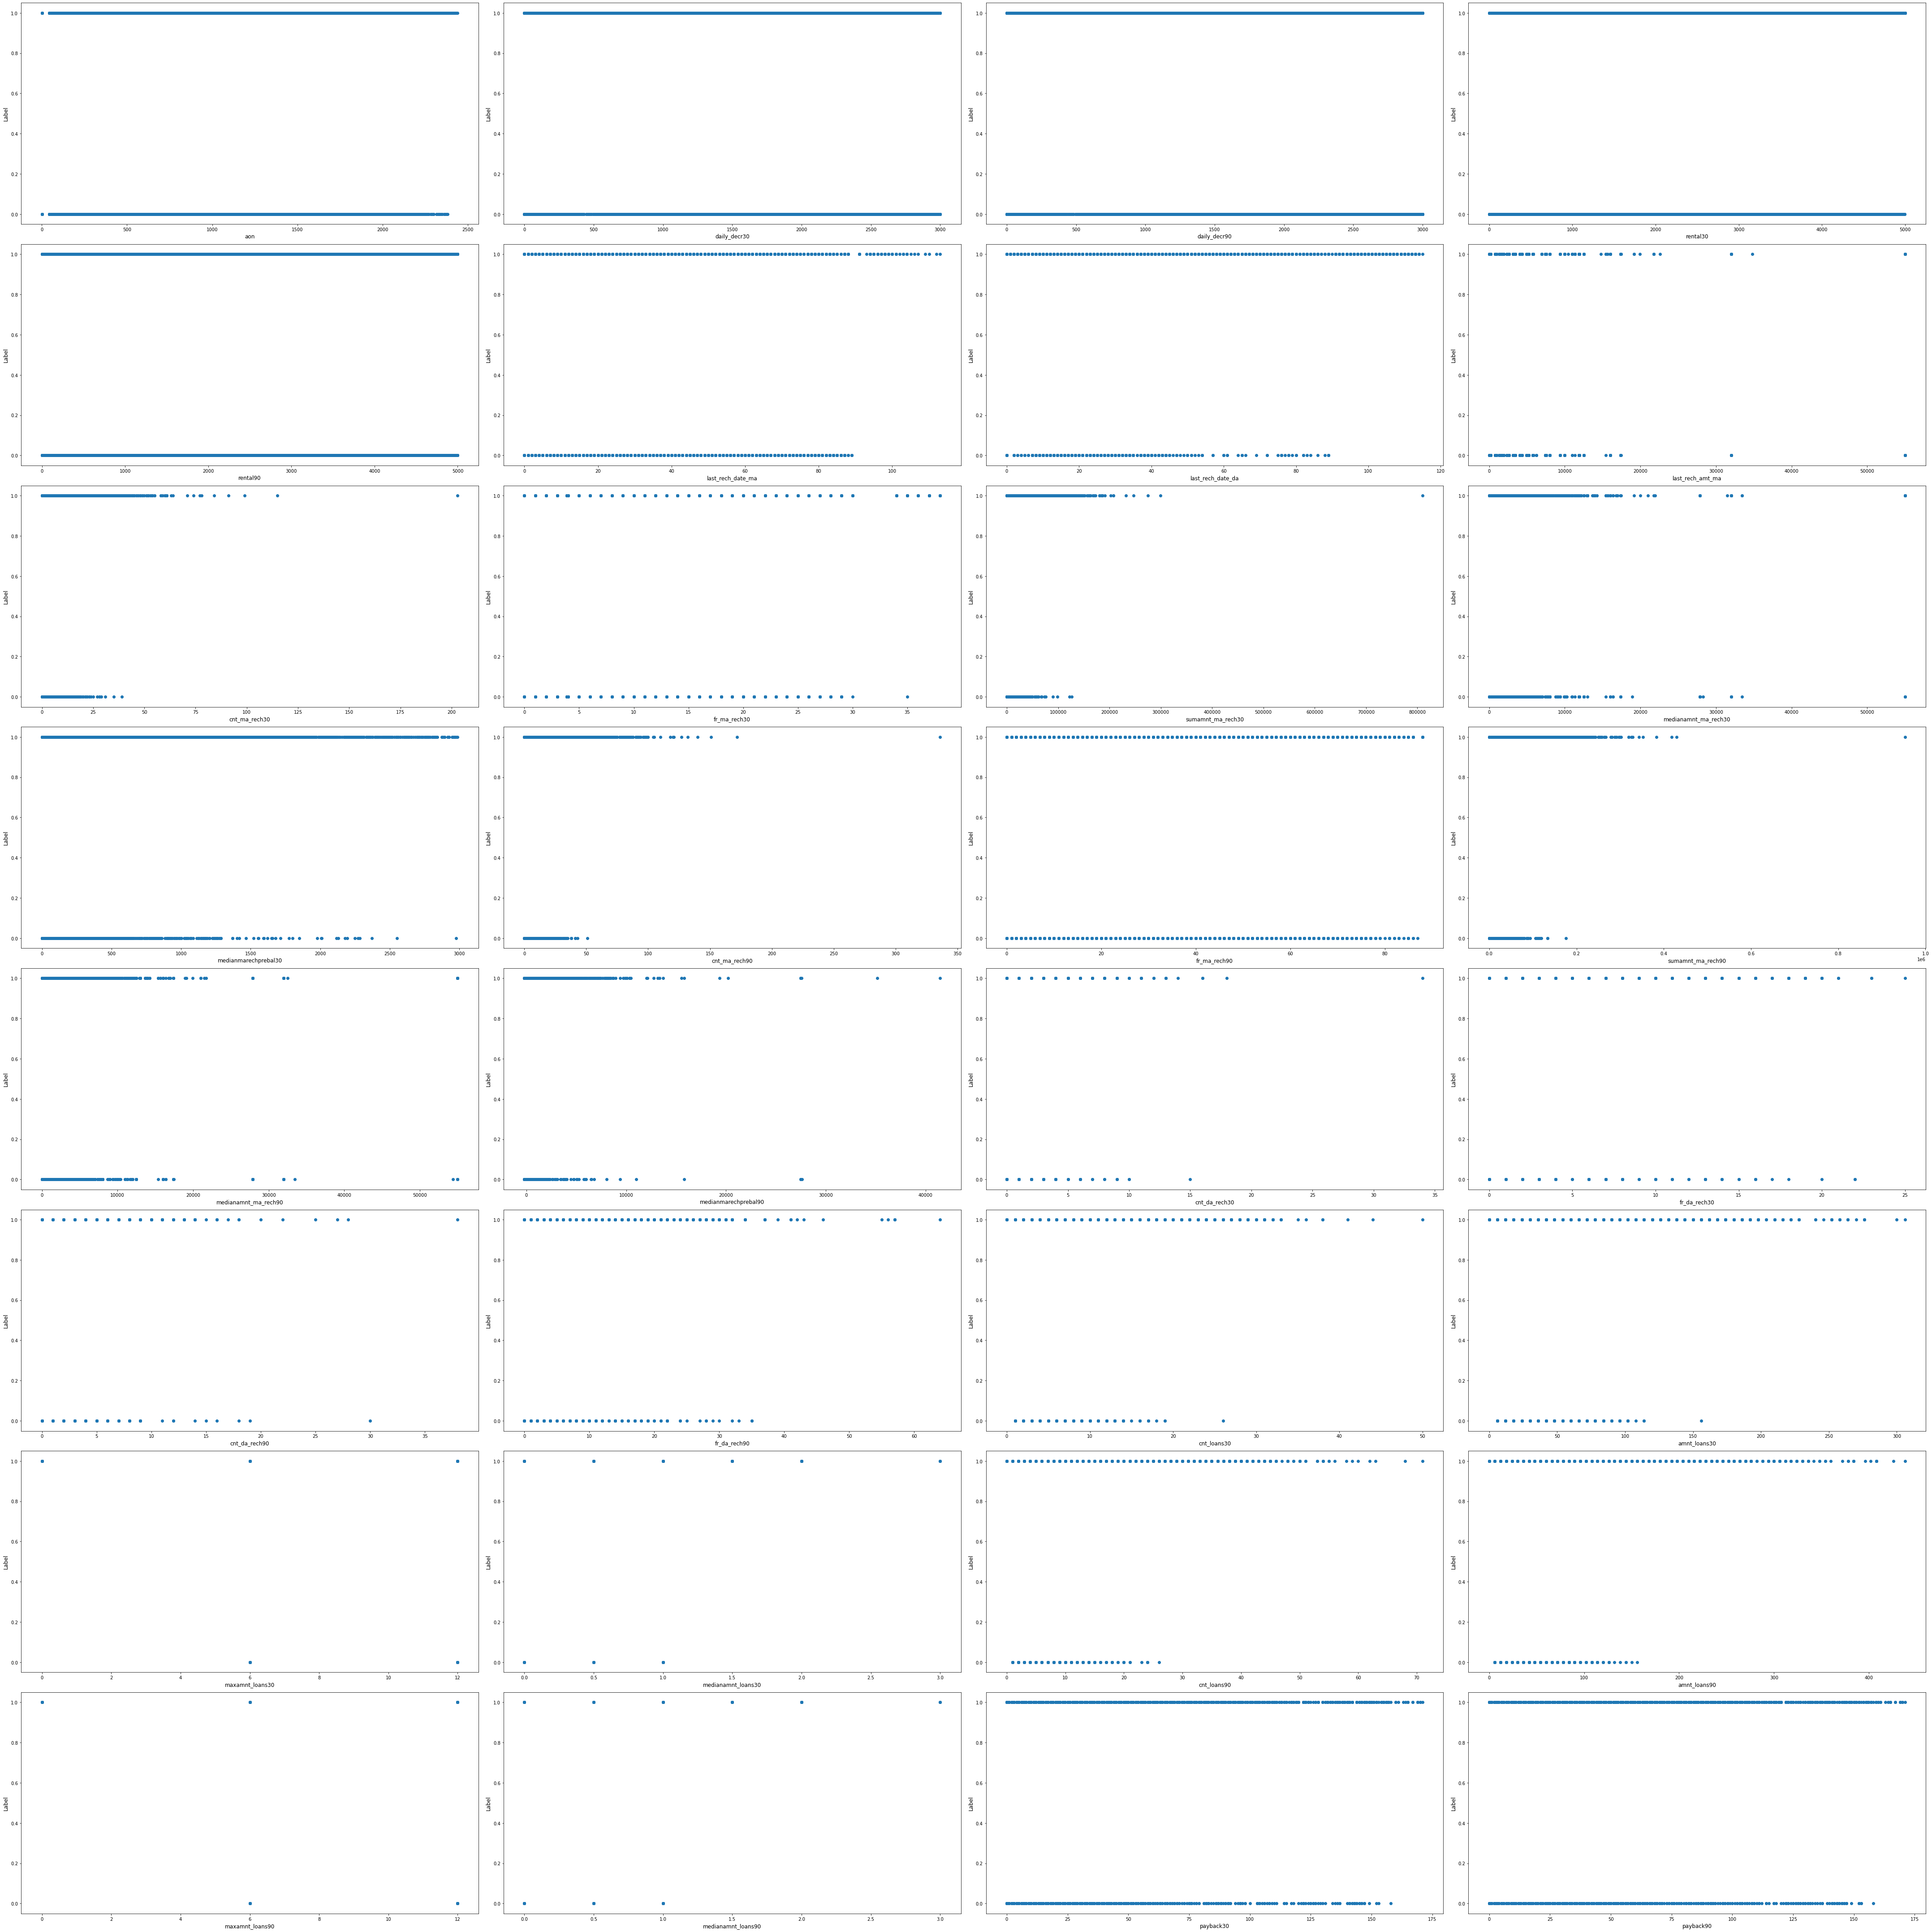

In [133]:
plt.figure(figsize=(60,60))
plotnumber=1

for column in x:
    if plotnumber<=32:
        ax=plt.subplot(8,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=12)
        plt.ylabel('Label', fontsize=12)
    plotnumber=plotnumber+1
plt.tight_layout()

# Checking for skewness

In [134]:
x.skew().sort_values(ascending=False)

medianmarechprebal90    44.880503
fr_da_rech30            31.164842
cnt_da_rech30           30.832071
fr_da_rech90            28.988083
cnt_da_rech90           27.267278
last_rech_date_da        9.708988
payback30                8.429388
payback90                6.985942
sumamnt_ma_rech30        6.386787
medianmarechprebal30     6.166626
sumamnt_ma_rech90        4.897950
medianamnt_loans90       4.895720
medianamnt_loans30       4.551043
last_rech_amt_ma         3.781149
medianamnt_ma_rech90     3.752706
last_rech_date_ma        3.583927
medianamnt_ma_rech30     3.512324
cnt_ma_rech90            3.425254
cnt_ma_rech30            3.283842
amnt_loans90             3.150006
cnt_loans90              3.004244
amnt_loans30             2.975719
cnt_loans30              2.713421
fr_ma_rech90             2.285423
daily_decr90             2.096214
daily_decr30             2.050816
fr_ma_rech30             2.024554
maxamnt_loans90          1.678304
maxamnt_loans30          1.435587
rental30      

# Transforming Data to remove skewness

In [135]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [136]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

fr_da_rech90            15.469700
fr_da_rech30            11.395146
cnt_da_rech30            8.084176
medianmarechprebal90     7.506286
cnt_da_rech90            6.006577
last_rech_date_da        5.829840
medianamnt_loans90       3.779598
medianamnt_loans30       3.447735
maxamnt_loans30          0.415986
maxamnt_loans90          0.364282
payback30                0.335711
payback90                0.246846
fr_ma_rech90             0.142952
fr_ma_rech30             0.132727
cnt_loans90              0.095378
last_rech_date_ma        0.038229
cnt_loans30              0.036243
amnt_loans30             0.001948
cnt_ma_rech30           -0.000145
cnt_ma_rech90           -0.002465
amnt_loans90            -0.008988
medianmarechprebal30    -0.030514
medianamnt_ma_rech90    -0.044604
aon                     -0.054660
last_rech_amt_ma        -0.061262
daily_decr90            -0.153409
daily_decr30            -0.158323
rental30                -0.175042
medianamnt_ma_rech30    -0.189628
sumamnt_ma_rec

# Scaling the data

In [137]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Splitting data into train and test data

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.8775734153963597 random_state 0
accuracy 0.8775734153963597 random_state 0
accuracy 0.8802929459195115 random_state 1
accuracy 0.8802929459195115 random_state 1
accuracy 0.877978959421742 random_state 2
accuracy 0.8811278895011808 random_state 3
accuracy 0.8811278895011808 random_state 3
accuracy 0.8786469142870774 random_state 4
accuracy 0.8772871490255015 random_state 5
accuracy 0.8790524583124597 random_state 6
accuracy 0.8750208735895417 random_state 7
accuracy 0.8777165485817887 random_state 8
accuracy 0.8786946253488871 random_state 9
accuracy 0.878575347694363 random_state 10
accuracy 0.8792194470287936 random_state 11
accuracy 0.8754741286767337 random_state 12
accuracy 0.8787661919416017 random_state 13
accuracy 0.8797919797705098 random_state 14
accuracy 0.8781698036689807 random_state 15
accuracy 0.8800305350795582 random_state 16
accuracy 0.8798635463632243 random_state 17
accuracy 0.8804360791049405 random_state 18
accuracy 0.8792433025596985 random_state 19
acc

In [139]:
#creating train-test-sloit using best random state observed(i.e.170)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y, test_size=0.2, random_state=170)

# Downsampling the imbalanced data set

In [140]:
from imblearn.under_sampling import NearMiss
from collections import Counter
ds=NearMiss(0.75)
x_train_ns,y_train_ns=ds.fit_sample(x_train,y_train)
print("Before fit ",Counter(y_train))
print("After fit ",Counter(y_train_ns))

Before fit  Counter({1: 146633, 0: 21041})
After fit  Counter({1: 28054, 0: 21041})


# Using Logistic Regression Model

In [141]:
LR=LogisticRegression()
LR.fit(x_train_ns, y_train_ns)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  54.17829623798278
[[ 2006  3115]
 [16093 20705]]
              precision    recall  f1-score   support

           0       0.11      0.39      0.17      5121
           1       0.87      0.56      0.68     36798

    accuracy                           0.54     41919
   macro avg       0.49      0.48      0.43     41919
weighted avg       0.78      0.54      0.62     41919



# Using KNeighbors Classifier Model

In [142]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train_ns, y_train_ns)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  56.09866647582243
[[ 3128  1993]
 [16410 20388]]
              precision    recall  f1-score   support

           0       0.16      0.61      0.25      5121
           1       0.91      0.55      0.69     36798

    accuracy                           0.56     41919
   macro avg       0.54      0.58      0.47     41919
weighted avg       0.82      0.56      0.64     41919



# Using Decision Tree Classifier

In [143]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train_ns, y_train_ns)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  43.293017486104155
[[ 3471  1650]
 [22121 14677]]
              precision    recall  f1-score   support

           0       0.14      0.68      0.23      5121
           1       0.90      0.40      0.55     36798

    accuracy                           0.43     41919
   macro avg       0.52      0.54      0.39     41919
weighted avg       0.81      0.43      0.51     41919



# Using Random Forest Classifier

In [144]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train_ns, y_train_ns)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  41.17464634175433
[[ 3722  1399]
 [23260 13538]]
              precision    recall  f1-score   support

           0       0.14      0.73      0.23      5121
           1       0.91      0.37      0.52     36798

    accuracy                           0.41     41919
   macro avg       0.52      0.55      0.38     41919
weighted avg       0.81      0.41      0.49     41919



# Using AdaBoost Classifier

In [145]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train_ns, y_train_ns)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  48.398101099739975
[[ 2886  2235]
 [19396 17402]]
              precision    recall  f1-score   support

           0       0.13      0.56      0.21      5121
           1       0.89      0.47      0.62     36798

    accuracy                           0.48     41919
   macro avg       0.51      0.52      0.41     41919
weighted avg       0.79      0.48      0.57     41919



# Using Gradient Boosting Classifier

In [146]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train_ns, y_train_ns)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  50.39958014265608
[[ 3263  1858]
 [18934 17864]]
              precision    recall  f1-score   support

           0       0.15      0.64      0.24      5121
           1       0.91      0.49      0.63     36798

    accuracy                           0.50     41919
   macro avg       0.53      0.56      0.44     41919
weighted avg       0.81      0.50      0.58     41919



# Using SVC

In [147]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train_ns, y_train_ns)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  43.397981822085455
[[ 3346  1775]
 [21952 14846]]
              precision    recall  f1-score   support

           0       0.13      0.65      0.22      5121
           1       0.89      0.40      0.56     36798

    accuracy                           0.43     41919
   macro avg       0.51      0.53      0.39     41919
weighted avg       0.80      0.43      0.51     41919



# Cross Validation

In [148]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.8749433437401111


In [149]:
scr2=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.8815943318857924


In [150]:
scr3=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.8630488644873712


In [151]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.910488429890521


In [152]:
scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.8972007631616414


In [153]:
scr6=cross_val_score(gbdt,x,y,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.9079215471069035


In [ ]:
scr7=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())


Random Forest Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [154]:
RandomForestClassifier()

RandomForestClassifier()

In [155]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [156]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train_ns,y_train_ns)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [157]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8)

In [158]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred) 

0.5207185285908538

# ROC AUC Plot

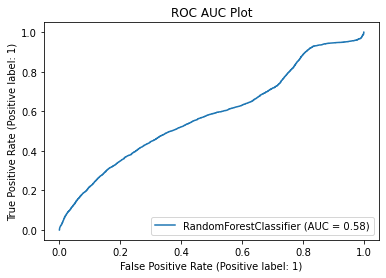

In [159]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [ ]:
Final Accuracy is 52% and AUC score is 58%, which depicts that our model is working wel

# Without Downsampling

In [160]:
RandomForestClassifier()

RandomForestClassifier()

In [161]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [162]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [163]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [166]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred) 

0.90739282902741

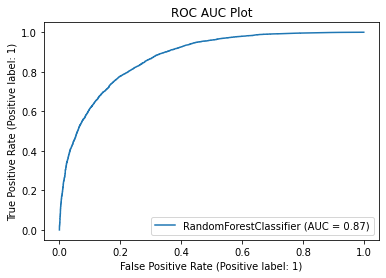

In [165]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()